In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [3]:
gold_data = pd.read_csv('Downloads/gld_price_data.csv')

In [4]:
gold_data

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.1800,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.2850,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.1670,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.0530,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.5900,1.557099
...,...,...,...,...,...,...
2285,5/8/2018,2671.919922,124.589996,14.060000,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.370000,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.410000,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.380000,15.5600,1.193118


In [5]:
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [6]:
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [9]:
gold_data.isnull().sum().any()

False

In [10]:
 gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303296
75%,2073.010070,132.840004,37.827501,22.882499,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [12]:
co = gold_data.corr()
co

,SPX,GLD,USO,SLV,EUR/USD
SPX,1.000000,0.049345,-0.591573,-0.274055,-0.672017
GLD,0.049345,1.000000,-0.186360,0.866632,-0.024375
USO,-0.591573,-0.186360,1.000000,0.167547,0.829317
SLV,-0.274055,0.866632,0.167547,1.000000,0.321631
EUR/USD,-0.672017,-0.024375,0.829317,0.321631,1.000000


<AxesSubplot:>

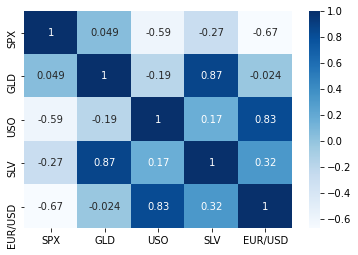

In [13]:
sns.heatmap(co, cbar=True, annot=True, cmap='Blues')

In [14]:
print(co['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='GLD', ylabel='Density'>

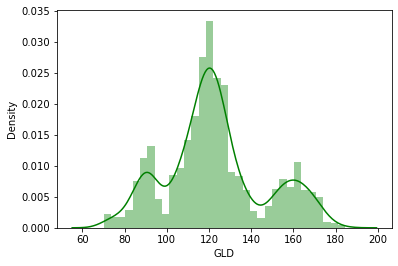

In [16]:
sns.distplot(gold_data['GLD'],color='green')

In [17]:
x = gold_data.drop(['Date','GLD'],axis=1)
y = gold_data['GLD']

In [19]:
print(y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


In [20]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [23]:
rfr = RandomForestRegressor(n_estimators=100)

In [24]:
rfr.fit(x_train,y_train)

RandomForestRegressor()

In [25]:
test_data_pred = rfr.predict(x_test)

In [26]:
print(test_data_pred)

[168.23439927  82.04309988 116.29440025 127.67300077 120.7096013
 154.75869716 150.05539928 126.25020024 117.47109873 126.05790037
 116.64390105 171.7106009  141.88409856 167.9001988  115.20379974
 117.60050076 138.86130336 170.18100116 158.80470257 158.51769914
 154.99309992 125.62710028 176.53539973 157.55770326 125.30450048
  93.65869967  77.20169975 120.46860017 119.12539955 167.47640026
  88.20070018 125.36250028  91.14210075 117.70580037 121.13609924
 136.52090029 115.56760108 115.2357005  145.33979886 106.97830089
 104.48770238  87.22919768 126.42890055 118.06560014 151.70709947
 119.83339984 108.34649991 107.94829796  93.23290069 126.95479814
  74.78370048 113.66939939 121.26199983 111.26889954 118.86569904
 120.56899946 159.48299964 168.52140104 146.75189664  86.11359907
  94.42170025  86.89659904  90.4314001  118.98510081 126.45480089
 127.70469988 169.52690104 122.41049927 117.39749863  98.46479994
 168.17480064 143.15719897 132.23550231 121.17590208 121.21609926
 119.543000

In [27]:
error_score = metrics.r2_score(y_test, test_data_pred)

In [28]:
print('R squarred error is :', error_score)

R squarred error is : 0.9898414895164124


In [30]:
y_test = list(y_test)

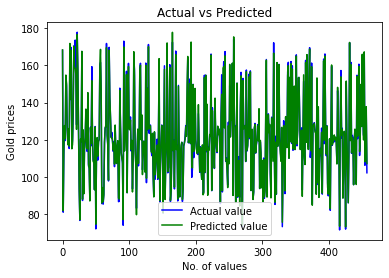

In [32]:
plt.plot(y_test,color='blue',label='Actual value')
plt.plot(test_data_pred,color='green',label='Predicted value')
plt.xlabel('No. of values')
plt.ylabel('Gold prices')
plt.title('Actual vs Predicted')
plt.legend()
plt.show()